# Model training

#### BTC-USDT for ROR_n6 with price action features


<br>

#### Performance by Model ID

```
model_id: d30c1dede5739befd5735455f45abc655dd64cd2
    - n_estimates = 500
    - max_depth = 10
    - Mean Absolute Error:	 0.00977
    - Mean Absolute Outcome:	 0.01451
    - Mean Absolute Percent Error:	 0.67343
    - Error Variance:	 0.00025
    - R-Squared:		 0.54131
```


<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [17]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [18]:
# Load model data
data = dataObject("""
SELECT * EXCEPT(load_rank)
FROM (
  SELECT
  RANK() OVER (PARTITION BY ticker_time ORDER BY etl_time) AS load_rank,
  * EXCEPT(
    conversionType, conversionSymbol,
    LAG1_open, LAG1_high, LAG1_low, LAG1_close,
    LAG2_open, LAG2_high, LAG2_low, LAG2_close,
    LAG3_open, LAG3_high, LAG3_low, LAG3_close,
    LAG4_open, LAG4_high, LAG4_low, LAG4_close,
    LAG5_open, LAG5_high, LAG5_low, LAG5_close,
    LAG6_open, LAG6_high, LAG6_low, LAG6_close,
    LAG7_open, LAG7_high, LAG7_low, LAG7_close,
    LAG8_open, LAG8_high, LAG8_low, LAG8_close,
    LAG9_open, LAG9_high, LAG9_low, LAG9_close,
    LAG10_open, LAG10_high, LAG10_low, LAG10_close,
    LAG11_open, LAG11_high, LAG11_low, LAG11_close,
    LAG12_open, LAG12_high, LAG12_low, LAG12_close,
    LAG13_open, LAG13_high, LAG13_low, LAG13_close,
    LAG14_open, LAG14_high, LAG14_low, LAG14_close,
    LAG15_open, LAG15_high, LAG15_low, LAG15_close,
    LAG16_open, LAG16_high, LAG16_low, LAG16_close,
    LAG17_open, LAG17_high, LAG17_low, LAG17_close,
    LAG18_open, LAG18_high, LAG18_low, LAG18_close,
    LAG19_open, LAG19_high, LAG19_low, LAG19_close,
    LAG20_open, LAG20_high, LAG20_low, LAG20_close,
    LAG21_open, LAG21_high, LAG21_low, LAG21_close,
    LAG22_open, LAG22_high, LAG22_low, LAG22_close,
    LAG23_open, LAG23_high, LAG23_low, LAG23_close,
    LAG24_open, LAG24_high, LAG24_low, LAG24_close
    )
  FROM `algom-trading.train_features.features_BTC_USDT_hour_i03_*`
  WHERE 
    _table_suffix IN (
      '20170101',
      '20180101',
      '20190101')
    AND year BETWEEN 2017 AND 2019
    AND LAG24_close > 0
)
WHERE load_rank = 1
ORDER BY ticker_time
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 20780/20780 [00:28<00:00, 728.67rows/s]

SUCCESS: Loaded SQL query.


In [19]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

20565


,ticker_time_sec,close,high,low,open,volume_base,volume,partition_date,etl_time,ticker_time,...,open_low21,open_close22,open_high22,open_low22,open_close23,open_high23,open_low23,open_close24,open_high24,open_low24
0,1503028800,4287.92,4292.39,4234.43,4292.39,50.69,216069.15,2021-01-03,2021-01-03 09:30:21.680305+00:00,2017-08-18 04:00:00+00:00,...,0.001948,0.001950,0.001952,0.001950,0.001950,0.001951,0.001949,0.001950,0.002258,0.001947
1,1503032400,4313.56,4340.62,4250.04,4287.92,64.00,274857.30,2021-01-03,2021-01-03 09:30:21.680305+00:00,2017-08-18 05:00:00+00:00,...,0.001953,0.001954,0.001954,0.001950,0.001952,0.001954,0.001952,0.001952,0.001953,0.001951
2,1503036000,4279.46,4316.98,4247.75,4313.56,63.95,274013.68,2021-01-03,2021-01-03 09:30:21.680305+00:00,2017-08-18 06:00:00+00:00,...,0.001943,0.001943,0.001944,0.001941,0.001942,0.001942,0.001939,0.001941,0.001942,0.001940
3,1503039600,4300.25,4304.67,4270.48,4279.46,68.92,295447.38,2021-01-03,2021-01-03 09:30:21.680305+00:00,2017-08-18 07:00:00+00:00,...,0.001960,0.001963,0.001963,0.001958,0.001958,0.001959,0.001957,0.001958,0.001958,0.001954
4,1503043200,4282.73,4320.71,4259.85,4300.25,73.83,316938.59,2021-01-03,2021-01-03 09:30:21.680305+00:00,2017-08-18 08:00:00+00:00,...,0.001952,0.001954,0.001955,0.001951,0.001953,0.001953,0.001949,0.001949,0.001950,0.001947


<br>

### Initialize modelRegression class

In [20]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n6',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES,
    to_bq=True,
)

SUCCESS: Loaded dataObject.
Initialized model. As a next step, run self.predict() or self.train().


In [21]:
# len(model.feature_list)
# list(model.feature_list)

In [22]:
# Specify regression parameters
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1,
    n_estimators=500,
    subsample=.9,
    criterion='friedman_mse', 
    min_samples_split=3, 
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_depth=10,
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None,
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0,
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001
)


# Train model
model.train(reg)

Training model on ROR_n6.
Model metadata added to `self.metadata.metadata`
SUCCESS: Loaded DataFrame.


1it [00:04,  4.22s/it]


Model metadata added to `self.metadata.parameters`
SUCCESS: Loaded DataFrame.


1it [00:03,  3.82s/it]


SUCCESS: Loaded DataFrame.


1it [00:03,  3.25s/it]


Set feature_importance to `self.feature_importance.feature_importance`
Fit model in 0:00:00.000019.
Get model performance.
Set evaluation to self.evaluations in 0:00:00.000019.
SUCCESS: Loaded DataFrame.


1it [00:08,  8.01s/it]

Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.01379
        - Mean Absolute Outcome:	 0.01394
        - Mean Absolute Percent Error:	 0.98919
        - Error Variance:	 0.00047
        - R-Squared:		 0.05578
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              `self.plot_predictions_scatterplot(start_date, end_date)`
              


In [23]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: d30c1dede5739befd5735455f45abc655dd64cd2
model_execution_id: 404a66c6aa8e6c71ba1e9309b26834a560cbac37


In [24]:
# Save model (optional)
model.save()


Dumped model to:
	/home/jovyan/algomosaic/data/models/20210103_GradientBoostingRegressor_d30c1dede5739befd5735455f45abc655dd64cd2.pickle
Uploaded pickle to Google Storage:
	https://storage.googleapis.com/algom-trading-sto/models/20210103_GradientBoostingRegressor_d30c1dede5739befd5735455f45abc655dd64cd2.pickle
SUCCESS: Loaded DataFrame.


1it [00:03,  3.18s/it]

Uploaded storage metadata to Google BigQuery:
	storage.model_storage_YYYYMMDD
Saved model to Google Storage:
	models/20210103_GradientBoostingRegressor_d30c1dede5739befd5735455f45abc655dd64cd2.pickle


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [25]:
start_date='2019-04-01'
end_date='2019-05-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


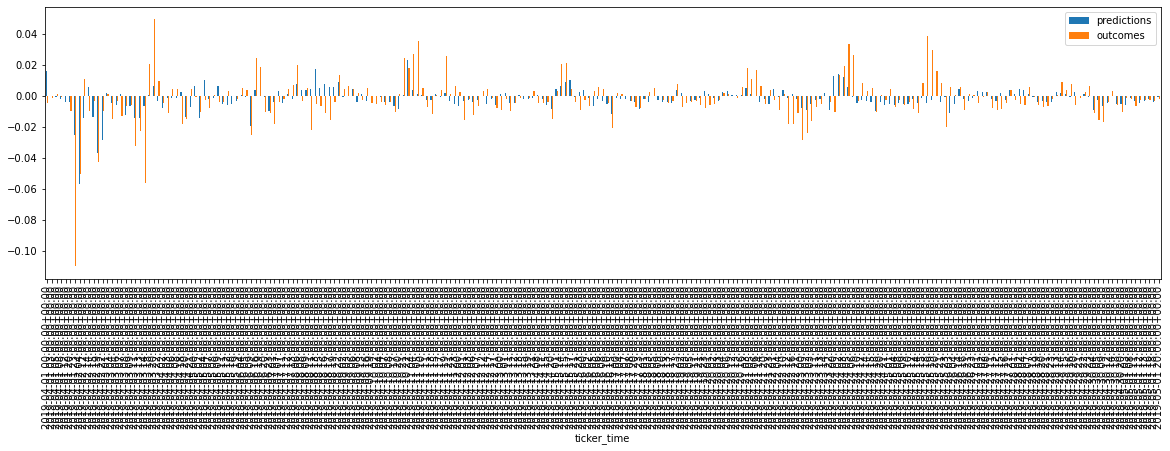

In [26]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


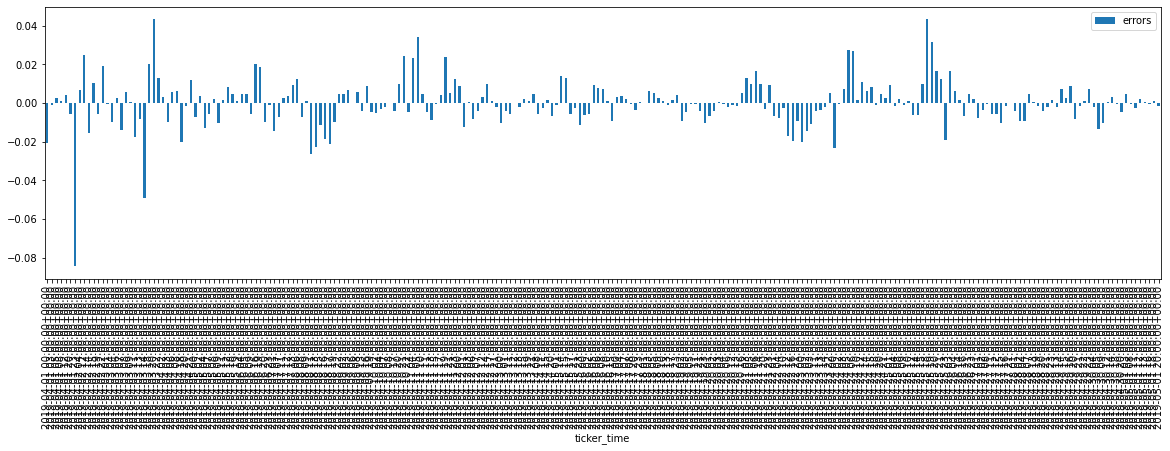

In [27]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


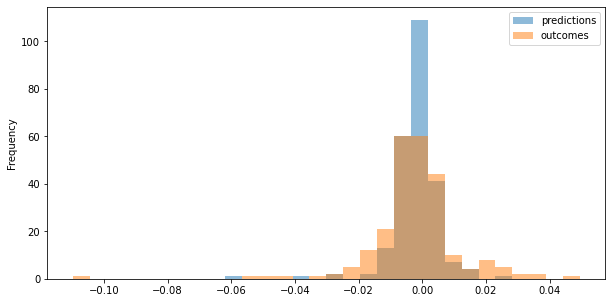

In [28]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


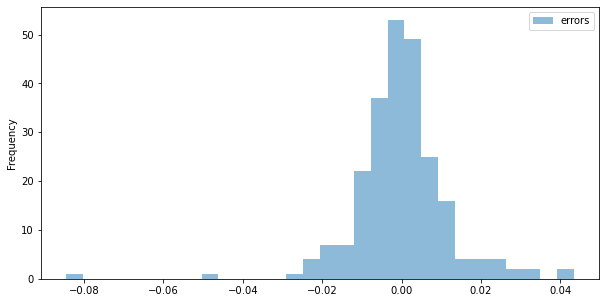

In [29]:
model_plot.plot_errors_histogram(start_date, end_date)

PLOT: Predictions by Date


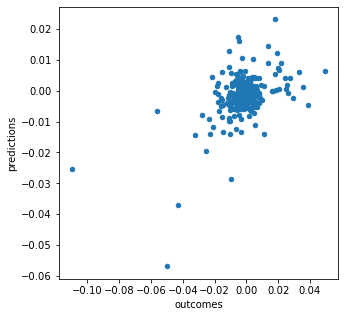

In [30]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [31]:
features = model.feature_importance.feature_importance
features[0:30]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,hour_of_day,0.04694,1.0,1.000000
1,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,day_of_week,0.04111,2.0,0.986486
2,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_low24,0.02424,3.0,0.972973
3,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close1,0.02364,4.0,0.959459
4,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high24,0.02257,5.0,0.945946
5,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_low1,0.02233,6.0,0.932432
6,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high1,0.01970,7.0,0.918919
7,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_low21,0.01946,8.0,0.905405
8,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_low3,0.01832,9.0,0.891892
9,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_low7,0.01781,10.0,0.878378


<br>

### Least import features

In [32]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
54,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high19,0.00986,55.0,0.270270
55,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close5,0.00979,56.0,0.256757
56,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high6,0.00973,57.0,0.243243
57,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high4,0.00955,58.0,0.229730
58,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close15,0.00948,59.0,0.216216
59,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close10,0.00925,60.0,0.202703
60,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close9,0.00921,61.0,0.189189
61,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close21,0.00920,62.0,0.175676
62,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_high13,0.00895,63.0,0.162162
63,404a66c6aa8e6c71ba1e9309b26834a560cbac37,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n6,open_close16,0.00884,64.0,0.148649


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
